<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/Decision_Tree_coded_model_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A simple decision tree Project
---

In this Project I am going to work with Iris data set, using the idea of a simple decision tree class.  I am going to code a simple decision tree which will be used to calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica or Iris-setosa or Iris-versicolor based on sepal and petal dimensions.  


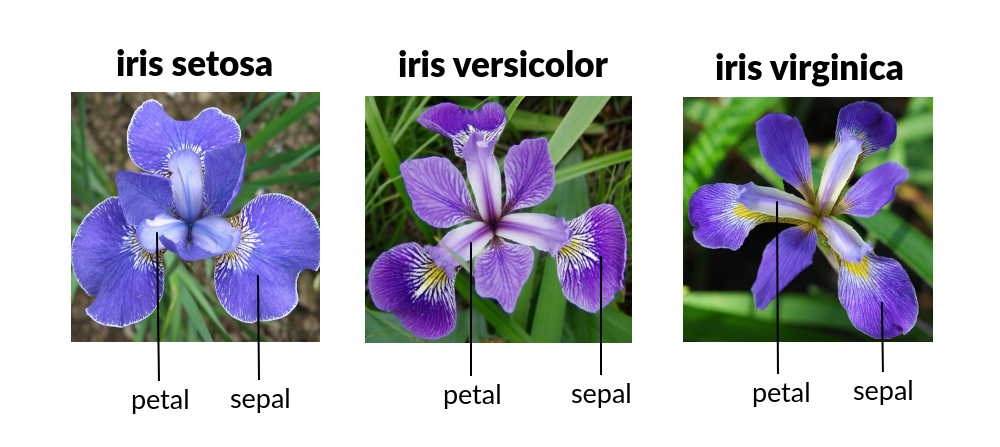

#*In this project I aim to:*

*  Divide the data set into train and test data - 70% of the rows for training and 30% for testing
*  Find effective indicators such as the mean, the median etc for each of the 4 columns - petal length, petal width, sepal length and sepal width.
*  Calculate the proportion of each column that are above or below the indicator chosen. Match that to each species (for example, proportion of Iris-virginica that have petal length above mean and proportion of the same species that are below mean etc)
*  Using the proportion from the previous step, infer how to effectively identify most of each species.  That is if the proportion of Iris-virginica abive mean is 1, then all of Iris-virginca have petal length on or above average. Similarly 0s can help us identify as definitely not that species. 
*  Code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of given Iris species
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or Iris-versicolor or Iris-setosa with a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?
* repeat the above processes for the next indicator e.g. median
* compare the proportion for each indicator to identify best indicator - let's say best indicator that which at least predicts 3/4th of the test data correctly!
* If none of the indicators work well - try to find an alternative method that will identify the species. Sometimes, a more complex decision tree may be needed.


### Exercise 1 - investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, median and upper and lower quartile values in each of the columns


In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)
iris_data

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Exercise 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.  From now, just use the train data set.


In [ ]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from the all columns
train_orig, test = train_test_split(iris_data, test_size=0.30)
train_orig.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.873333,2.993333,3.875238,1.248571
std,0.774506,0.408154,1.669453,0.736430
min,4.300000,2.000000,1.100000,0.100000
25%,5.200000,2.800000,1.700000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.700000,4.100000,6.900000,2.500000


### Exercise 3 - assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species.

*  Drop any null values from each column

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.




In [ ]:
# get the mean for each column and apply a function to encode into 1 (above mean) and 0 (mean or below mean)
def encode(df, **kwds):
  cutoff = kwds['indicator']
  key = kwds['key']
  if df[key] > cutoff:
    return 1
  else:
    return 0

train = train_orig.copy()
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train['sepal-length'] = train.apply(encode, axis=1, key='sepal-length', indicator=train_orig['sepal-length'].mean())
train['sepal-width'] = train.apply(encode, axis=1, key='sepal-width', indicator=train_orig['sepal-width'].mean())
train['petal-length'] = train.apply(encode, axis=1, key='petal-length', indicator=train_orig['petal-length'].mean())
train['petal-width'] = train.apply(encode, axis=1, key='petal-width', indicator=train_orig['petal-width'].mean())

print(train.describe())


       sepal-length  sepal-width  petal-length  petal-width
count    105.000000   105.000000    105.000000   105.000000
mean       0.485714     0.600000      0.647619     0.600000
std        0.502193     0.492248      0.480003     0.492248
min        0.000000     0.000000      0.000000     0.000000
25%        0.000000     0.000000      0.000000     0.000000
50%        0.000000     1.000000      1.000000     1.000000
75%        1.000000     1.000000      1.000000     1.000000
max        1.000000     1.000000      1.000000     1.000000


Now I have the mean, std, count etc for the four possible features of Iris to identify which species it belongs to. I can choose all four or it might be more efficient to pick 2 or 3 features that are most distinct for each of the species.

### Exercise 4 - Calculate the proportion of values on or above the mean that are of each species

We are going to focus on the `Iris-virginica` species first.

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

We will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean.

*  Do this for all four columns, for `Iris-virginica`  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

*  By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are.  Calculate these

The first one has been done for you.

*  We will also need the proportion of those BELOW the median that are NOT Iris-virginica.  Calculate these in the same way



In [ ]:
# calculate the proportion of results where the value is on or above mean that are of the species Iris-virginica
def get_prop_above(df, spec,column):
  train_spec = df[(df[column]== 1) & (df['species']==spec)][column].count()
  train_all = df[df[column]== 1][column].count()
  prop_spec = train_spec/train_all
  return prop_spec

vir_sep_len = get_prop_above(train, 'Iris-virginica', 'sepal-length')
vir_sep_width = get_prop_above(train, 'Iris-virginica', 'sepal-width')
vir_petal_len = get_prop_above(train, 'Iris-virginica', 'petal-length')
vir_petal_width = get_prop_above(train, 'Iris-virginica', 'petal-width')

print("Proportion using Sepal length using above mean: ", vir_sep_len, "\nProportion using Sepal width using above mean: ",vir_sep_width, "\nProportion using Petal length using above mean: ",vir_petal_len, "\nProportion using Petal width using above mean: ", vir_petal_width)

Proportion using Sepal length using above mean:  0.5882352941176471 
Proportion using Sepal width using above mean:  0.3333333333333333 
Proportion using Petal length using above mean:  0.5147058823529411 
Proportion using Petal width using above mean:  0.5555555555555556


From the proportion test, we see none of the numbers are anywhere near 1. Particularly, sepal width shows that very small proportion of Iris-virginica has sepal-width above or equal to mean. However, 0s are equally useful since if one of the species has 0 proportion in one of teh features that measn we can use that feature to eliminate that species for that feature. 

### Exercise 5 - Calculate the proportion of each column where the value is below median that are of species `Iris-virginica`

Repeat the code above, this time looking for values below the mean

In [ ]:
# calculate the proportion of results where the value is below mean that are of the species Iris-virginica
def get_prop_below(df, spec,column):
  train_spec = df[(df[column]== 0) & (df['species']==spec)][column].count()
  train_all = df[df[column]== 0][column].count()
  prop_spec = train_spec/train_all
  return prop_spec

vir_sep_len1 = get_prop_below(train, 'Iris-virginica', 'sepal-length')
vir_sep_width1 = get_prop_below(train, 'Iris-virginica', 'sepal-width')
vir_petal_len1 = get_prop_below(train, 'Iris-virginica', 'petal-length')
vir_petal_width1 = get_prop_below(train, 'Iris-virginica', 'petal-width')

print("Proportion using Sepal length using below mean: ", vir_sep_len1, "\nProportion using Sepal width using below mean: ",vir_sep_width1, "\nProportion using Petal length using below mean: ",vir_petal_len1, "\nProportion using Petal width using below mean: ", vir_petal_width1)

Proportion using Sepal length using below mean:  0.09259259259259259 
Proportion using Sepal width using below mean:  0.3333333333333333 
Proportion using Petal length using below mean:  0.0 
Proportion using Petal width using below mean:  0.0


Here Iris-virginica has 0 proportion below mean for both petal length and petal width. This means that Iris-virginica has above average petal length and petal width. 

### Exercise 5 - calculate for the other two Iris species
---

Do the same calculations for the Iris-versicolor species, then for the Iris-setosa species.






In [ ]:
# Iris-setosa

set_sep_len = get_prop_above(train, 'Iris-setosa', 'sepal-length')
set_sep_width = get_prop_above(train, 'Iris-setosa', 'sepal-width')
set_petal_len = get_prop_above(train, 'Iris-setosa', 'petal-length')
set_petal_width = get_prop_above(train, 'Iris-setosa', 'petal-width')

set_sep_len1 = get_prop_below(train, 'Iris-setosa', 'sepal-length')
set_sep_width1 = get_prop_below(train, 'Iris-setosa', 'sepal-width')
set_petal_len1 = get_prop_below(train, 'Iris-setosa', 'petal-length')
set_petal_width1 = get_prop_below(train, 'Iris-setosa', 'petal-width')

#Iris-versicolor

ver_sep_len = get_prop_above(train, 'Iris-versicolor', 'sepal-length')
ver_sep_width = get_prop_above(train, 'Iris-versicolor', 'sepal-width')
ver_petal_len = get_prop_above(train, 'Iris-versicolor', 'petal-length')
ver_petal_width = get_prop_above(train, 'Iris-versicolor', 'petal-width')

ver_sep_len1 = get_prop_below(train, 'Iris-versicolor', 'sepal-length')
ver_sep_width1 = get_prop_below(train, 'Iris-versicolor', 'sepal-width')
ver_petal_len1 = get_prop_below(train, 'Iris-versicolor', 'petal-length')
ver_petal_width1 = get_prop_below(train, 'Iris-versicolor', 'petal-width')

Now that we have the results for all 3 species, let us take a look at them all and decide what conditions to use to identify their features.

### Exercise 6 - predict from the results
---

Create a list of dictionaries from the results Exercise 4 and 5 (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  A reliable prediction may be one over 0.5

I can only use 2 lists to create a dictionary (unless I create a dictionary of lists. This means that I will have create a dictionaly for each species. I am not sure if it make sense to have multiple dictionaries - unless I see a task below using these dictionaries. So I will create a dataframe instead so I can look at the species and the parameter values in one shot.

In [ ]:
#create a dataframe to see the results
species_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-viriginica']
sep_len_ab_mean = [set_sep_len, ver_sep_len, vir_sep_len]
sep_wid_ab_mean = [set_sep_width, ver_sep_width, vir_sep_width]
pet_len_ab_mean = [set_petal_len, ver_petal_len, vir_petal_len]
pet_wid_ab_mean = [set_petal_width, ver_petal_width, vir_petal_width]
sep_len_bel_mean = [set_sep_len1, ver_sep_len1, vir_sep_len1]
sep_wid_bel_mean = [set_sep_width1, ver_sep_width1, vir_sep_width1]
pet_len_bel_mean = [set_petal_len1, ver_petal_len1, vir_petal_len1]
pet_wid_bel_mean = [set_petal_width1, ver_petal_width1, vir_petal_width1]
iris_df = pd.DataFrame(list(zip(species_list, sep_len_ab_mean, sep_wid_ab_mean, pet_len_ab_mean, pet_wid_ab_mean, sep_len_bel_mean, sep_wid_bel_mean, pet_len_bel_mean, pet_wid_bel_mean)), columns =['species', 'sepal_length_above_mean','sepal_width_above_mean','petal_length_above_mean','petal_width_above_mean','sepal_length_below_mean','sepal_width_below_mean','petal_length_below_mean','petal_width_below_mean'])
iris_df

# show which columns are reliable predictors



,species,sepal_length_above_mean,sepal_width_above_mean,petal_length_above_mean,petal_width_above_mean,sepal_length_below_mean,sepal_width_below_mean,petal_length_below_mean,petal_width_below_mean
0,Iris-setosa,0.000000,0.476190,0.000000,0.000000,0.555556,0.000000,0.810811,0.714286
1,Iris-versicolor,0.411765,0.190476,0.485294,0.444444,0.351852,0.666667,0.189189,0.285714
2,Iris-viriginica,0.588235,0.333333,0.514706,0.555556,0.092593,0.333333,0.000000,0.000000


Looking at the above results, I think the sepal width both above and below mean seem to be not very reliabale/consistent meaure to classify the species.

1. Iris-setosa clearly has smaller than average sepal length (above mean is 0), petal length (above mean is 0) and petal width (above mean is 0).
2. Iris-virginica clearly has larger than average petal width (below mean is 0). But sepal length (0.65), petal length (0.65) give accurate results only 65% of the time.
3. Iris-versicolor is around average in all columns. 

To me, it looks like petal length and width are really good way identify the species. So we only need to know the petal length and petal width for separating the species. If both are below mean (short and thin petals), then the species is setosa. If the petal length is large but width is small (long and thin petals) it is virginica and if neither of these holds then it is versicolor. 

So my decision tree will be something along the lines of...

1. if petal length and petal width are smaller than average then the species is Iris-setosa. 
2. If not, check if petal width is below average, if no, the species is Iris-virginica. 
3. Otherwise, it is Iris-versicolor.

Also, are the length and width of the sepals and petals correlated? That is if the length is more is the width smaller (thin and long?)or they are unconnected? If they are correlated, may be we don't have to use both to get to a decision. This made me wonder - what if I did a correlation test to see how the sepal length and width are correlated to petal length and width. So here is a heatmap using seaborn.

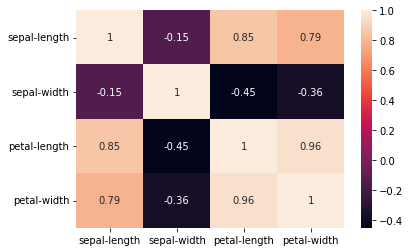

In [ ]:
import seaborn as sns
sns.heatmap(train_orig.corr(), annot = True);

So this shows that the sepal width is most likely independent of the other variables while petal length and width seem to be highly correlated. So maybe as a first test petal length and/or width might be good indicators to find the species. Then we can add sepal length to further confirm the result.

Looking at the gg plot, further below confirms that all we need is only the petal width and petal length to make our decision tree.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


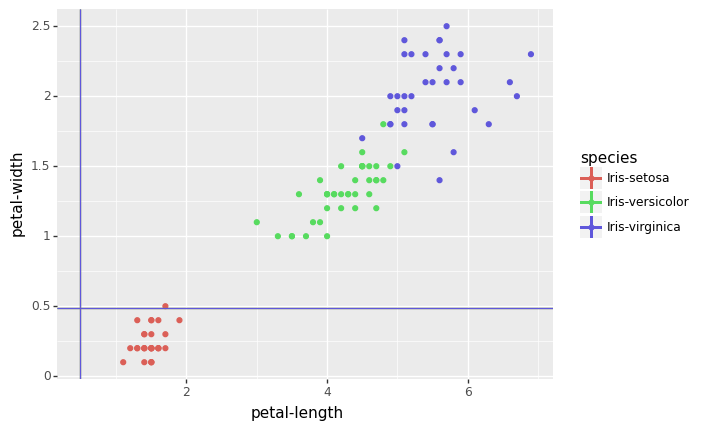

<ggplot: (8740146506901)>

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train_orig, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train_orig, aes(xintercept=train['sepal-length'].mean(), color='species')) + geom_hline(train_orig, aes(yintercept=train['sepal-length'].mean(), color='species'))

##So here is my proposed decision tree:

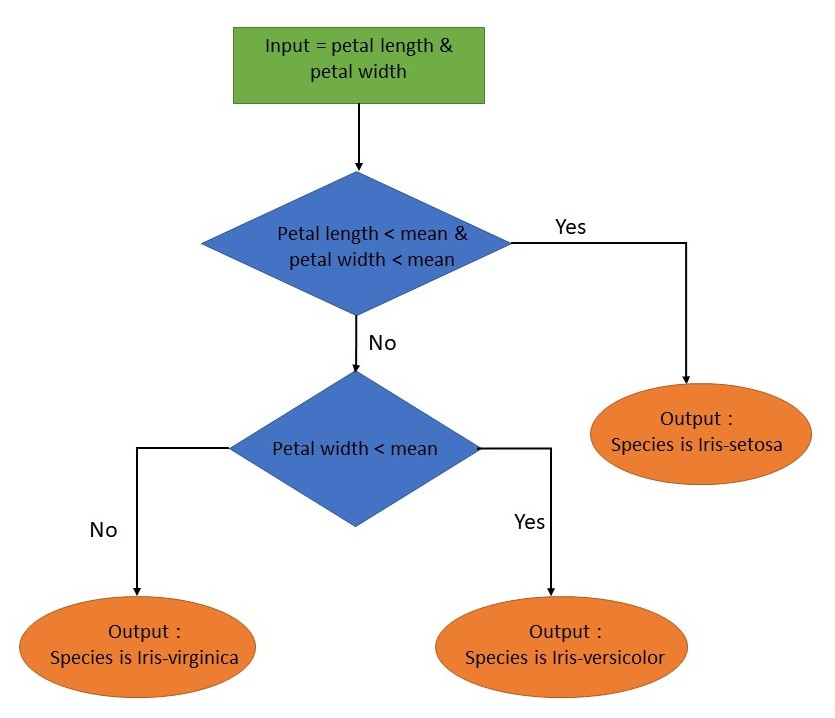

### Exercise 6 - Make a decision tree
---

Use pencil and paper or a graphical application to create a decision tree for Iris-virginica, using the following rules (use the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree (yours might be slightly different):

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




In [ ]:
def get_species(df):
  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
    if df['petal-width'] == 0 and df['petal-length'] == 0:
        return 'iris-setosa'
        if df['petal-width'] == 0:
            return 'iris-versicolor'
    return 'Iris-virginica' 

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 


Proportion correctly identified 0.3333333333333333


Clearly using the mean identifies slightly more than a third of the species (most likely Iris-setosa). However the Iris-virginica and Iris-versicolor do not have a big difference in mean values for petal widths and lengths. So it is time to change the measure for encoding. 

### Exercise 7 - change the measure

We are currently using the mean to act as the decision making line.  We can use the decision tree with a different line.

Change the mean values so that you are instead using the median instead for all four columns.  The code should not need changing except for where you calculated the mean.

Run all the code again.  Is the proportion of correct values better this time?   Is the decision tree still appropriate?


In [ ]:
# Let's try median


train_med = train_orig.copy()
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train_med['sepal-length'] = train_med.apply(encode, axis=1, key='sepal-length', indicator=train_orig['sepal-length'].median())
train_med['sepal-width'] = train_med.apply(encode, axis=1, key='sepal-width', indicator=train_orig['sepal-width'].median())
train_med['petal-length'] = train_med.apply(encode, axis=1, key='petal-length', indicator=train_orig['petal-length'].median())
train_med['petal-width'] = train_med.apply(encode, axis=1, key='petal-width', indicator=train_orig['petal-width'].median())


Before I decide if median is a good indicator, I would like to look at the gg plot to see if that separates the species enough for me to use it.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


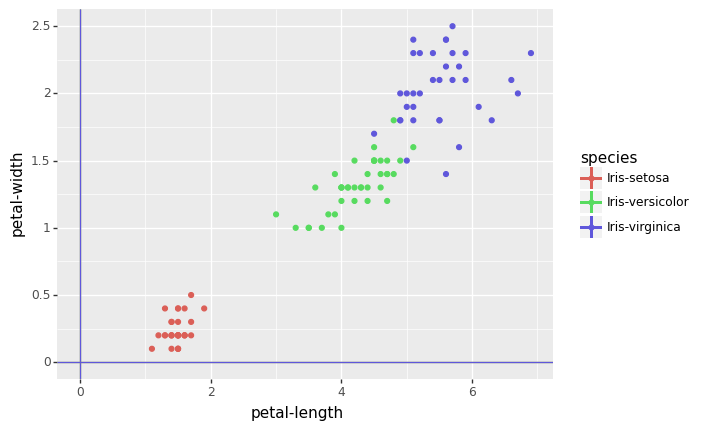

<ggplot: (8740146447581)>

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train_orig, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train_orig, aes(xintercept=train['sepal-length'].median(), color='species')) + geom_hline(train_orig, aes(yintercept=train['sepal-length'].median(), color='species'))

What do you notice? (write your answer here)

While the median as an indicator seems to be doing better than the mean, it doesn't seem to do an awful lot better than mean in separating versicolor and virginica. I expect that I will probably get a slightly better percentage of species identified than the mean.

In [ ]:
# Iris-setosa

set_sl_med = get_prop_above(train_med, 'Iris-setosa', 'sepal-length')
set_sw_med = get_prop_above(train_med, 'Iris-setosa', 'sepal-width')
set_pl_med = get_prop_above(train_med, 'Iris-setosa', 'petal-length')
set_pw_med = get_prop_above(train_med, 'Iris-setosa', 'petal-width')

set_sl_med1 = get_prop_below(train_med, 'Iris-setosa', 'sepal-length')
set_sw_med1 = get_prop_below(train_med, 'Iris-setosa', 'sepal-width')
set_pl_med1 = get_prop_below(train_med, 'Iris-setosa', 'petal-length')
set_pw_med1 = get_prop_below(train_med, 'Iris-setosa', 'petal-width')

#Iris-virginica

vir_sl_med = get_prop_above(train_med, 'Iris-virginica', 'sepal-length')
vir_sw_med = get_prop_above(train_med, 'Iris-virginica', 'sepal-width')
vir_pl_med = get_prop_above(train_med, 'Iris-virginica', 'petal-length')
vir_pw_med = get_prop_above(train_med, 'Iris-virginica', 'petal-width')

vir_sl_med1 = get_prop_below(train_med, 'Iris-virginica', 'sepal-length')
vir_sw_med1 = get_prop_below(train_med, 'Iris-virginica', 'sepal-width')
vir_pl_med1 = get_prop_below(train_med, 'Iris-virginica', 'petal-length')
vir_pw_med1= get_prop_below(train_med, 'Iris-virginica', 'petal-width')

#Iris-versicolor

ver_sl_med = get_prop_above(train_med, 'Iris-versicolor', 'sepal-length')
ver_sw_med = get_prop_above(train_med, 'Iris-versicolor', 'sepal-width')
ver_pl_med = get_prop_above(train_med, 'Iris-versicolor', 'petal-length')
ver_pw_med = get_prop_above(train_med, 'Iris-versicolor', 'petal-width')

ver_sl_med1 = get_prop_below(train_med, 'Iris-versicolor', 'sepal-length')
ver_sw_med1 = get_prop_below(train_med, 'Iris-versicolor', 'sepal-width')
ver_pl_med1 = get_prop_below(train_med, 'Iris-versicolor', 'petal-length')
ver_pw_med1 = get_prop_below(train_med, 'Iris-versicolor', 'petal-width')

In [ ]:
#create a dataframe to see the results
sl_ab_med = [set_sl_med, ver_sl_med, vir_sl_med]
sw_ab_med = [set_sw_med, ver_sw_med, vir_sw_med]
pl_ab_med = [set_pl_med, ver_pl_med, vir_pl_med]
pw_ab_med = [set_pw_med, ver_pw_med, vir_pw_med]
sl_bel_med = [set_sl_med1, ver_sl_med1, vir_sl_med1]
sw_bel_med = [set_sw_med1, ver_sw_med1, vir_sw_med1]
pl_bel_med = [set_pl_med1, ver_pl_med1, vir_pl_med1]
pw_bel_med = [set_pw_med1, ver_pw_med1, vir_pw_med1]
iris_med_df = pd.DataFrame(list(zip(species_list, sl_ab_med, sw_ab_med, pl_ab_med, pw_ab_med, sl_bel_med, sw_bel_med, pl_bel_med, pw_bel_med)), columns =['species', 'sepal_length_above_median','sepal_width_above_median','petal_length_above_median','petal_width_above_median','sepal_length_below_median','sepal_width_below_median','petal_length_below_median','petal_width_below_median'])
iris_med_df


,species,sepal_length_above_median,sepal_width_above_median,petal_length_above_median,petal_width_above_median,sepal_length_below_median,sepal_width_below_median,petal_length_below_median,petal_width_below_median
0,Iris-setosa,0.000000,0.600,0.000000,0.000000,0.555556,0.092308,0.555556,0.566038
1,Iris-versicolor,0.411765,0.125,0.313725,0.326923,0.351852,0.538462,0.444444,0.433962
2,Iris-viriginica,0.588235,0.275,0.686275,0.673077,0.092593,0.369231,0.000000,0.000000


Again from the above table, it looks like my decision tree can remain the same, since, iris-setosa has petal lengths and width below median (above median both are 0) and iris-virginica has petal length and width above median (below median they are both 0).

In [ ]:
# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.3333333333333333


As expected the median is slightly better at claissifying the species than mean. But still less than half of the sample has been identified correctly. So median too is not a great indicator. 

### Exercise 8 - try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?

In [ ]:
# Let's try upper quantile

train_up = train_orig.copy()
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train_up['sepal-length'] = train_up.apply(encode, axis=1, key='sepal-length', indicator=train_orig['sepal-length'].quantile(0.75))
train_up['sepal-width'] = train_up.apply(encode, axis=1, key='sepal-width', indicator=train_orig['sepal-width'].quantile(0.75))
train_up['petal-length'] = train_up.apply(encode, axis=1, key='petal-length', indicator=train_orig['petal-length'].quantile(0.75))
train_up['petal-width'] = train_up.apply(encode, axis=1, key='petal-width', indicator=train_orig['petal-width'].quantile(0.75))

train_up.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,0.247619,0.228571,0.219048,0.238095
std,0.433699,0.421927,0.415585,0.427960
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


Let's see if this is a better indicator than median and/or mean. First, let's look at ggplot for a visual indication.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


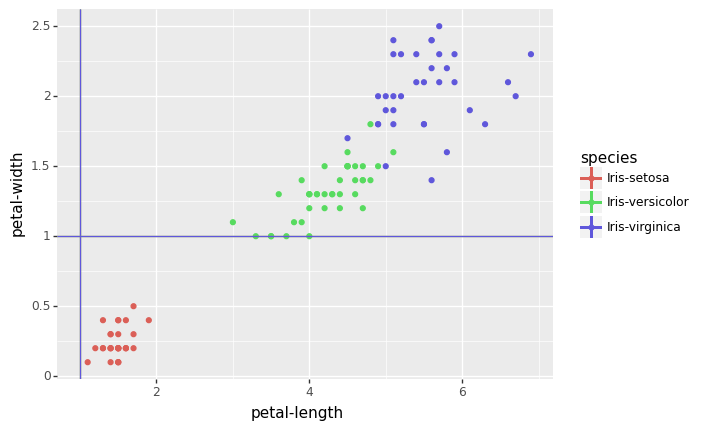

<ggplot: (8740146404009)>

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train_orig, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train_orig, aes(xintercept=train['sepal-length'].quantile(0.75), color='species')) + geom_hline(train_orig, aes(yintercept=train['sepal-length'].quantile(0.75), color='species'))

I am not sure if this is a good idicator for separating iris-setosa like the median was since part of versicolor is tangled on the line. The other two species are still a bit tangled together. I am not sure using lower quantile will help this since most of tangled data is above the upper quantile.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


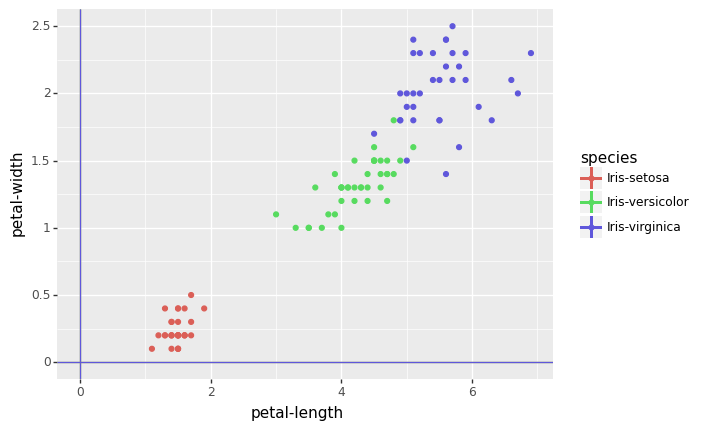

<ggplot: (8740146357257)>

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train_orig, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train_orig, aes(xintercept=train['sepal-length'].quantile(0.25), color='species')) + geom_hline(train_orig, aes(yintercept=train['sepal-length'].quantile(0.25), color='species'))

As expected, using the lower quantile give no better indication than mean/median to select the species. We may have to try a combination of quartile values to separate iris-virginica and iris-versicolor. 

What will happen if I use a different upper quartile as indicator value?

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


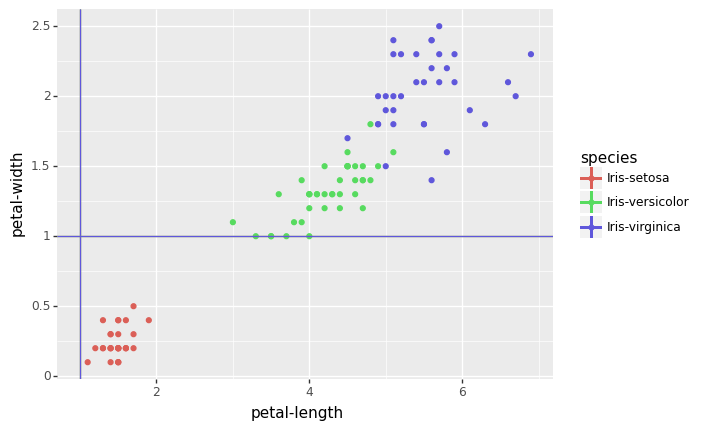

<ggplot: (8740146309101)>

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train_orig, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train_orig, aes(xintercept=train['sepal-length'].quantile(0.95), color='species')) + geom_hline(train_orig, aes(yintercept=train['sepal-length'].quantile(0.95), color='species'))

Not much help even after 95% cut off!

So let us first try the upper quartile, we may need more than one indicator to separate versicolor and virginica -which I will do if I get time. For now, let us use the upper quartile to see how we fare.

In [ ]:
# Let's try upper quantile

train = train_orig.copy()
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train['sepal-length'] = train.apply(encode, axis=1, key='sepal-length', indicator=train['sepal-length'].quantile(0.75))
train['sepal-width'] = train.apply(encode, axis=1, key='sepal-width', indicator=train['sepal-width'].quantile(0.75))
train['petal-length'] = train.apply(encode, axis=1, key='petal-length', indicator=train['petal-length'].quantile(0.75))
train['petal-width'] = train.apply(encode, axis=1, key='petal-width', indicator=train['petal-width'].quantile(0.75))

train.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,0.247619,0.228571,0.219048,0.238095
std,0.433699,0.421927,0.415585,0.427960
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Iris-setosa

set_sl_up = get_prop_above(train, 'Iris-setosa', 'sepal-length')
set_sw_up = get_prop_above(train, 'Iris-setosa', 'sepal-width')
set_pl_up = get_prop_above(train, 'Iris-setosa', 'petal-length')
set_pw_up = get_prop_above(train, 'Iris-setosa', 'petal-width')

set_sl_up1 = get_prop_below(train, 'Iris-setosa', 'sepal-length')
set_sw_up1 = get_prop_below(train, 'Iris-setosa', 'sepal-width')
set_pl_up1 = get_prop_below(train, 'Iris-setosa', 'petal-length')
set_pw_up1 = get_prop_below(train, 'Iris-setosa', 'petal-width')

#Iris-virginica

vir_sl_up = get_prop_above(train, 'Iris-virginica', 'sepal-length')
vir_sw_up = get_prop_above(train, 'Iris-virginica', 'sepal-width')
vir_pl_up = get_prop_above(train, 'Iris-virginica', 'petal-length')
vir_pw_up = get_prop_above(train, 'Iris-virginica', 'petal-width')

vir_sl_up1 = get_prop_below(train, 'Iris-virginica', 'sepal-length')
vir_sw_up1 = get_prop_below(train, 'Iris-virginica', 'sepal-width')
vir_pl_up1 = get_prop_below(train, 'Iris-virginica', 'petal-length')
vir_pw_up1= get_prop_below(train, 'Iris-virginica', 'petal-width')

#Iris-versicolor

ver_sl_up = get_prop_above(train, 'Iris-versicolor', 'sepal-length')
ver_sw_up = get_prop_above(train, 'Iris-versicolor', 'sepal-width')
ver_pl_up = get_prop_above(train, 'Iris-versicolor', 'petal-length')
ver_pw_up = get_prop_above(train, 'Iris-versicolor', 'petal-width')

ver_sl_up1 = get_prop_below(train, 'Iris-versicolor', 'sepal-length')
ver_sw_up1 = get_prop_below(train, 'Iris-versicolor', 'sepal-width')
ver_pl_up1 = get_prop_below(train, 'Iris-versicolor', 'petal-length')
ver_pw_up1 = get_prop_below(train, 'Iris-versicolor', 'petal-width')

In [ ]:
sl_ab_up = [set_sl_up, ver_sl_up, vir_sl_med]
sw_ab_up = [set_sw_up, ver_sw_up, vir_sw_med]
pl_ab_up = [set_pl_up, ver_pl_up, vir_pl_med]
pw_ab_up = [set_pw_up, ver_pw_up, vir_pw_med]
sl_bel_up = [set_sl_up1, ver_sl_up1, vir_sl_up1]
sw_bel_up = [set_sw_up1, ver_sw_up1, vir_sw_up1]
pl_bel_up = [set_pl_up1, ver_pl_up1, vir_pl_up1]
pw_bel_up = [set_pw_up1, ver_pw_up1, vir_pw_up1]
iris_up_df = pd.DataFrame(list(zip(species_list, sl_ab_up, sw_ab_up, pl_ab_up, pw_ab_up, sl_bel_up, sw_bel_up, pl_bel_up, pw_bel_up)), columns =['species', 'sepal_length_above_upper_quantile','sepal_width_above_upper_quantile','petal_length_above_upper_quantile','petal_width_above_upper_quantile','sepal_length_below_upper_quantile','sepal_width_below_upper_quantile','petal_length_below_upper_quantile','petal_width_below_upper_quantile'])
iris_up_df

,species,sepal_length_above_upper_quantile,sepal_width_above_upper_quantile,petal_length_above_upper_quantile,petal_width_above_upper_quantile,sepal_length_below_upper_quantile,sepal_width_below_upper_quantile,petal_length_below_upper_quantile,petal_width_below_upper_quantile
0,Iris-setosa,0.000000,0.791667,0.000000,0.000000,0.379747,0.135802,0.365854,0.375
1,Iris-versicolor,0.230769,0.041667,0.000000,0.000000,0.430380,0.481481,0.487805,0.500
2,Iris-viriginica,0.588235,0.275000,0.686275,0.673077,0.189873,0.382716,0.146341,0.125


The above results show that
1. iris-setosa has petal length, petal width and sepal length below upper quartile.
2. iris-versicolor has petal length and petal width below upper quartile
3. iris-virginica has all lengths and width more dispersed than the other two species.

##So my decision tree now is:

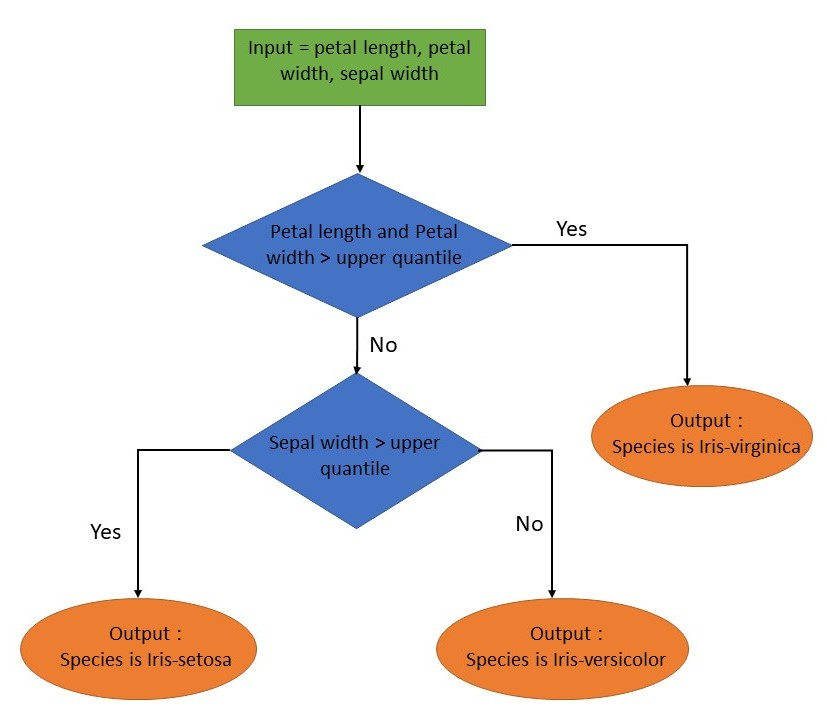

With this in mind, we will have change our decision function get_species. So here goes...

In [ ]:
def get_species_quar(df):
  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
    if df['petal-width'] == 0 and df['petal-length'] == 0:
        if df['sepal-length'] == 0:
            return 'iris-setosa'
        return 'iris-versicolor'
    return 'Iris-virginica' 

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.3333333333333333


This fares worse than mean and median! 

So far, from what I have seen 
1. Mean and median have the same decision tree.
2. Median is a better indicator to separate Iris-setosa. But Iris-versicolor and Iris-virginia are still confounded together.
3. Using upper-quratile as an indicator, confounds all three species and their features and fares worse than mean and median.
4. The decision tree has to change for upper-quartile.

If one is interested in separating the 3 species succesfully a combination of indicators might be necessary. For example, use median to identify setosa, remove them, and use another indicator to separate virginica and versicolor.

Another option would be to use logistic regression to separate the species. 

##**Using Logistic Regression:**

Given that the data looks like each of the species can be separated by a line (see gg-plot), as long as the lines are not exactly flat. I would like to try and use logistic regression to separate the 3 species.


For further reading and references on how Logistic regression is used in Biological and social sciences, see,
https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc


# New logic introduced in this worksheet:

1.  Adding headings to a CSV if none currently exist
2.  Splitting a data set into train and test sets

### What did I think of this project?

This definetely is a very interesting project and I can see it being very useful for identifying and classifying species. I think it will easily be a Machine learning project too. I had used train and test method, separated the data randomly and then used train data to test my model. Potentially, my model shoudl work for any data - so I test it with my test data. Clearly my model doesn't do very well even in the train data. I think it needs more than 1 indicator. I would like to carry this further later where I separate Iris-setosa with median, remove it and use another indicator/s to separate Iris-versicolor and Iris-virginica. I will have to figure out how to automatically seperate the new remaining data into train and test, so that, we can continue it as many times as needed. Given that the data looks like the species can be separated by a line, I would like to try and use logistic regression and test it against this method.